# Compare two binary models
author: [Mathieu Renzo](mrenzo@flatironinstitute.org)

In [2]:
import sys
# the line below import stuff from git@github.com:mathren90/plotFunc.git
sys.path.append('/mnt/home/mrenzo/codes/python_stuff/plotFunc/')
from MESAreader import *
import matplotlib.pyplot as plt
from plotDefaults import *

In [3]:
set_plotDefaults()

done in plotDefaults.py


In [4]:
root = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01"
fiducial = root+"/re-run_exponential/binary_to_postRLOF/"
time_res = root+"/res_tests/time_res/binary_to_postRLOF/"
space_res = root+"/res_tests/space_res/binary_to_postRLOF/"

/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/
/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/res_tests/time_res/binary_to_postRLOF/


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


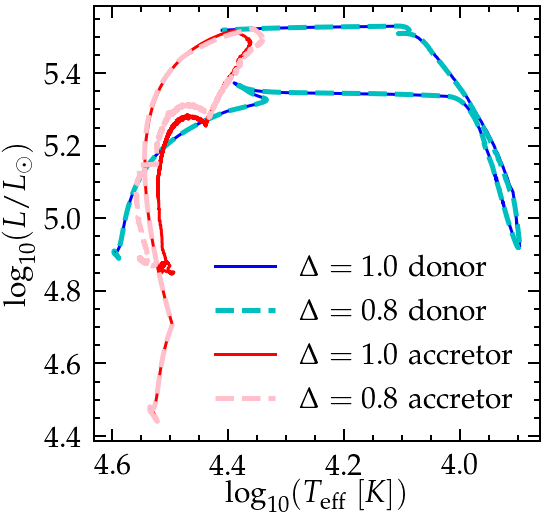

In [4]:
def getlogLlogTeff(hfile):
    src, col = getSrcCol(hfile)
    log_Teff = src[:, col.index("log_Teff")]
    logL = src[:, col.index("log_L")]
    return logL, log_Teff


def HRD(binary1, binary2, fig_name=""):
    print(colored(binary1, "blue"))
    print(colored(binary2, "blue"))
    fig = plt.figure()
    gs = gridspec.GridSpec(100, 100)
    ax = fig.add_subplot(gs[:,:])
    
    # donors
    # ------binary1
    hfile_donor1 = binary1+'/LOGS1/history.data'
    Ldonor1, Teffdonor1 = getlogLlogTeff(hfile_donor1)
    ax.plot(Teffdonor1, Ldonor1, c='b', label=r"$\Delta=1.0\ \mathrm{donor}$")
    # ------binary1
    hfile_donor2 = binary2+'/LOGS1/history.data'
    Ldonor2, Teffdonor2 = getlogLlogTeff(hfile_donor2)
    ax.plot(Teffdonor2, Ldonor2, c='c', lw=5, ls='--', label=r"$\Delta=0.8\ \mathrm{donor}$")
    # accretors
    # ---------binary2
    hfile_accretor1 = binary1+'/LOGS2/history.data'
    Laccretor1, Teffaccretor1 = getlogLlogTeff(hfile_accretor1)
    ax.plot(Teffaccretor1, Laccretor1, c='r', label=r"$\Delta=1.0\ \mathrm{accretor}$")
    # ------binary1
    hfile_accretor2 = binary2+'/LOGS2/history.data'
    Laccretor2, Teffaccretor2 = getlogLlogTeff(hfile_accretor2)
    ax.plot(Teffaccretor2, Laccretor2, c='#FFC0CB', lw=5, ls='--', label=r"$\Delta=0.8\ \mathrm{accretor}$")
    
    ax.invert_xaxis()
    ax.legend()
    ax.set_xlabel(r"$\log_{10}(T_\mathrm{eff}\ [K])$")
    ax.set_ylabel(r"$\log_{10}(L/L_\odot)$")
    if fig_name!="":
        plt.savefig(fig_name, dpi=10)

# test
HRD(fiducial, time_res, fig_name="/mnt/home/mrenzo/TMP/HRD_time_res.pdf")    

/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/
/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/res_tests/time_res/binary_to_postRLOF/


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)
/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


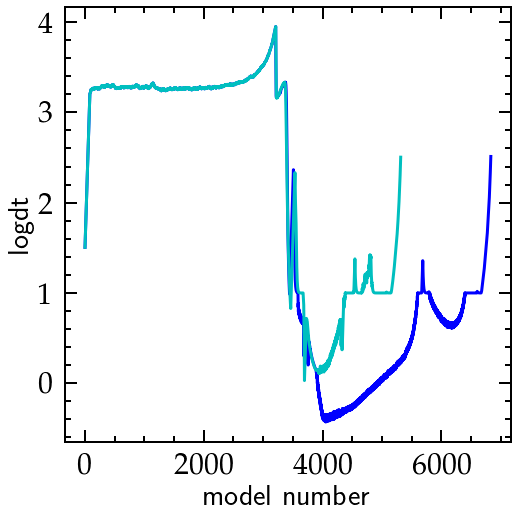

In [6]:
def get_timesteps_mesh(hfile):
    src, col = getSrcCol(hfile)
    mn = src[:, col.index("model_number")]
    dt = src[:, col.index("log_dt")]
    nz = src[:, col.index("num_zones")]
    return mn, dt, nz

def dt_plot(binary1, binary2):
    print(colored(binary1, "blue"))
    print(colored(binary2, "blue"))
    fig = plt.figure()
    gs = gridspec.GridSpec(100, 100)
    ax = fig.add_subplot(gs[:,:])
    
    hfile_donor1 = binary1+'/LOGS1/history.data'
    mn, dt, nz = get_timesteps_mesh(hfile_donor1)
    ax.plot(mn, dt, c='b')
    
    hfile_donor2 = binary2+'/LOGS1/history.data'
    mn, dt, nz = get_timesteps_mesh(hfile_donor2)
    ax.plot(mn, dt, c='c')

    # timesteps are the same, so no need for showing accretors
    # hfile_accretor1 = binary1+'/LOGS2/history.data'
    # mn, dt, nz = get_timesteps_mesh(hfile_accretor1)
    # ax.plot(mn, dt, c='r')

    # hfile_accretor2 = binary2+'/LOGS2/history.data'
    # mn, dt, nz = get_timesteps_mesh(hfile_accretor2)
    # ax.plot(mn, dt, c='#FFC0CB')

    ax.set_xlabel(r"model number")
    ax.set_ylabel(r"logdt")




def nz_plot(binary1, binary2, fig_name=""):
    print(colored(binary1, "blue"))
    print(colored(binary2, "blue"))
    fig = plt.figure()
    gs = gridspec.GridSpec(100, 100)
    ax = fig.add_subplot(gs[:50,:])
    bx = fig.add_subplot(gs[50:,:])
    
    hfile_donor1 = binary1+'/LOGS1/history.data'
    mn, dt, nz = get_timesteps_mesh(hfile_donor1)
    ax.plot(mn, nz, c='b')
    
    hfile_donor2 = binary2+'/LOGS1/history.data'
    mn, dt, nz = get_timesteps_mesh(hfile_donor2)
    ax.plot(mn, nz, c='c')

    hfile_accretor1 = binary1+'/LOGS2/history.data'
    mn, dt, nz = get_timesteps_mesh(hfile_accretor1)
    bx.plot(mn, nz, c='r')

    hfile_accretor2 = binary2+'/LOGS2/history.data'
    mn, dt, nz = get_timesteps_mesh(hfile_accretor2)
    bx.plot(mn, nz, c='#FFC0CB')
    
    bx.set_xlabel(r"$\mathrm{model\ number}$")
    ax.set_ylabel(r"$\#\ \mathrm{mesh\ points}$")
    bx.set_ylabel(r"$\#\ \mathrm{mesh\ points}$")
    if fig_name != "":
        plt.savefig(fig_name, dpi=10)
    
dt_plot(fiducial, time_res)
# nz_plot(fiducial, space_res, fig_name="/mnt/home/mrenzo/TMP/num_mesh_points.pdf")  

In [ ]:
# make unique resolution plot
def resolution_plot(binary1, binary2, fig_name=""):
    fig = plt.figure(figsize=(20,10))
    gs = gridspec.GridSpec(110, 100)
    ax_HRD = fig.add_subplot(gs[:,:50])
    ax = fig.add_subplot(gs[50:,60:])
    bx = fig.add_subplot(gs[:50,60:])

    print(colored(binary1, "blue"))
    print(colored(binary2, "blue"))

    # donors
    # ------binary1
    hfile_donor1 = binary1+'/LOGS1/history.data'
    Ldonor1, Teffdonor1 = getlogLlogTeff(hfile_donor1)
    ax_HRD.plot(Teffdonor1, Ldonor1, c='b', label=r"$\Delta=1.0\ \mathrm{donor}$")
    # ------binary1
    hfile_donor2 = binary2+'/LOGS1/history.data'
    Ldonor2, Teffdonor2 = getlogLlogTeff(hfile_donor2)
    ax_HRD.plot(Teffdonor2, Ldonor2, c='c', lw=5, ls='--', label=r"$\Delta=0.8\ \mathrm{donor}$")
    # accretors
    # ---------binary2
    hfile_accretor1 = binary1+'/LOGS2/history.data'
    Laccretor1, Teffaccretor1 = getlogLlogTeff(hfile_accretor1)
    ax_HRD.plot(Teffaccretor1, Laccretor1, c='r', label=r"$\Delta=1.0\ \mathrm{accretor}$")
    # ------binary1
    hfile_accretor2 = binary2+'/LOGS2/history.data'
    Laccretor2, Teffaccretor2 = getlogLlogTeff(hfile_accretor2)
    ax_HRD.plot(Teffaccretor2, Laccretor2, c='#FFC0CB', lw=5, ls='--', label=r"$\Delta=0.8\ \mathrm{accretor}$")
    
    ax_HRD.invert_xaxis()
    ax_HRD.legend()
    ax_HRD.set_xlabel(r"$\log_{10}(T_\mathrm{eff}\ [K])$")
    ax_HRD.set_ylabel(r"$\log_{10}(L/L_\odot)$")

    hfile_donor1 = binary1+'/LOGS1/history.data'
    mn, dt, nz = get_timesteps_mesh(hfile_donor1)
    ax.plot(mn, nz, c='b')
    
    hfile_donor2 = binary2+'/LOGS1/history.data'
    mn, dt, nz = get_timesteps_mesh(hfile_donor2)
    ax.plot(mn, nz, c='c')

    hfile_accretor1 = binary1+'/LOGS2/history.data'
    mn, dt, nz = get_timesteps_mesh(hfile_accretor1)
    bx.plot(mn, nz, c='r')

    hfile_accretor2 = binary2+'/LOGS2/history.data'
    mn, dt, nz = get_timesteps_mesh(hfile_accretor2)
    bx.plot(mn, nz, c='#FFC0CB')
    
    ax.set_xlabel(r"$\mathrm{model\ number}$")
    ax.set_ylabel(r"$\#\ \mathrm{mesh\ points}$")
    bx.set_ylabel(r"$\#\ \mathrm{mesh\ points}$")
    bx.set_xlim(ax.get_xlim())
    bx.set_xticklabels([])
    
    if fig_name != "":
        plt.savefig(fig_name, dpi=10)

    
 

resolution_plot(fiducial, space_res, fig_name="/mnt/home/mrenzo/TMP/spatial_res_plot.pdf")